In [1]:
print('Connect to google drive')
from google.colab import drive
drive.mount('/gdrive')

Connect to google drive
Mounted at /gdrive


In [2]:
print('Import necessary libraries')

import numpy as np
import pandas as pd
import scipy.stats as stats
from pathlib import Path
import glob
import pickle

import warnings
warnings.filterwarnings("ignore")

import random
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import gc
import tqdm

from sklearn.model_selection import StratifiedKFold, GroupKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn import neighbors
import joblib

import matplotlib.pyplot as plt

Import necessary libraries


In [3]:
base_path='/gdrive/My Drive/Colab Notebooks/'
weights_path='/gdrive/My Drive/Colab Notebooks/weights/'

In [4]:
def euclidean_distance(x_true,y_true, x_pred, y_pred):
    return np.mean(((x_true-x_pred)**2+(y_true-y_pred)**2)**0.5)    

In [5]:
version='forPdata423_PostProcess'


In [6]:
data=pd.read_csv('/gdrive/My Drive/Colab Notebooks/data423.csv.zip') #
data.shape

(14373, 316)

In [7]:
data.head()

,rsid1,rsid2,rsid3,rsid4,rsid5,rsid6,rsid7,rsid8,rsid9,rsid10,...,rsid307,rsid308,rsid309,rsid310,rsid311,rsid312,x,y,timestamp,path
0,-93,-999,-81,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,43.26,25.89,1633934464983,record_2021_10_11_07_41_02
1,-93,-999,-81,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,43.26,25.89,1633934467125,record_2021_10_11_07_41_02
2,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,43.26,25.89,1633934469251,record_2021_10_11_07_41_02
3,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,43.26,25.89,1633934471370,record_2021_10_11_07_41_02
4,-78,-999,-999,-95,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,40.85,25.74,1633934473508,record_2021_10_11_07_41_02


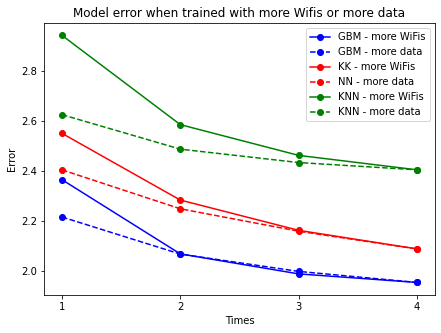

In [14]:
lgbm_less_wifis = np.array([1.9529932, 1.987232, 2.067338, 2.364662])[::-1]
Keras_less_wifis = np.array([2.0872567, 2.161658, 2.282963, 2.550239])[::-1]
KNN_less_wifis = np.array([2.4040933, 2.461928, 2.585112, 2.942725])[::-1]

lgbm_less_data = np.array([1.9529932, 1.997157, 2.066566, 2.215151])[::-1]
Keras_less_data = np.array([2.0872567, 2.1581273, 2.248020, 2.403997])[::-1]
KNN_less_data = np.array([2.4040933, 2.433218, 2.486910, 2.625083])[::-1]

plt.figure(figsize=(7,5))
plt.plot(lgbm_less_wifis,'o-',color='b', label='GBM - more WiFis')
plt.plot(lgbm_less_data,'--o',color='b', label='GBM - more data')

plt.plot(Keras_less_wifis,'o-',color='r', label='KK - more WiFis')
plt.plot(Keras_less_data,'--o',color='r', label='NN - more data')

plt.plot(KNN_less_wifis,'o-',color='g', label='KNN - more WiFis')
plt.plot(KNN_less_data,'--o',color='g', label='KNN - more data')
plt.title('Model error when trained with more Wifis or more data')
plt.legend()
plt.xlabel('Times')
# plt.xticks([0,25,50,75])
# plt.xticks(np.arange(4), [0,25,50,75])
plt.xticks(np.arange(4), [1,2,3,4])
plt.ylabel('Error')
plt.savefig('models_errorsImR.jpg')
plt.show()

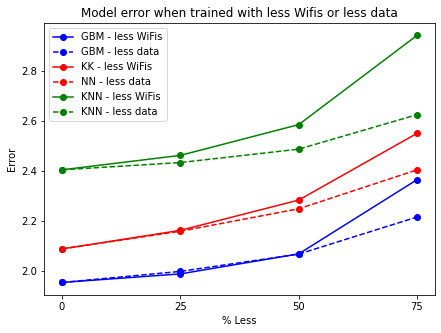

In [ ]:
lgbm_less_wifis = ([1.9529932, 1.987232, 2.067338, 2.364662])
Keras_less_wifis = ([2.0872567, 2.161658, 2.282963, 2.550239])
KNN_less_wifis = ([2.4040933, 2.461928, 2.585112, 2.942725])

lgbm_less_data = ([1.9529932, 1.997157, 2.066566, 2.215151])
Keras_less_data = ([2.0872567, 2.1581273, 2.248020, 2.403997])
KNN_less_data = ([2.4040933, 2.433218, 2.486910, 2.625083])

plt.figure(figsize=(7,5))
plt.plot(lgbm_less_wifis,'o-',color='b', label='GBM - less WiFis')
plt.plot(lgbm_less_data,'--o',color='b', label='GBM - less data')

plt.plot(Keras_less_wifis,'o-',color='r', label='KK - less WiFis')
plt.plot(Keras_less_data,'--o',color='r', label='NN - less data')

plt.plot(KNN_less_wifis,'o-',color='g', label='KNN - less WiFis')
plt.plot(KNN_less_data,'--o',color='g', label='KNN - less data')
plt.title('Model error when trained with less Wifis or less data')
plt.legend()
plt.xlabel('% Less')
# plt.xticks([0,25,50,75])
plt.xticks(np.arange(4), [0,25,50,75])
plt.ylabel('Error')
plt.show()

In [ ]:
data.shape

(14373, 316)

In [ ]:
len(np.unique(data.path))

423

In [ ]:
data.shape[0]/len(np.unique(data.path))

33.97872340425532

In [ ]:
fl=data.iloc[:,:312].values.flatten()
fl.shape,fl[fl>-999].shape,fl[fl>-999].shape[0]/fl.shape[0]

((4484376,), (718282,), 0.1601743475569399)

In [ ]:
data2=data.iloc[:,:312]
data2[data2==-999]=np.nan

In [ ]:
data2

,rsid1,rsid2,rsid3,rsid4,rsid5,rsid6,rsid7,rsid8,rsid9,rsid10,...,rsid303,rsid304,rsid305,rsid306,rsid307,rsid308,rsid309,rsid310,rsid311,rsid312
0,-93.0,NaN,-81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-93.0,NaN,-81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-78.0,NaN,NaN,-95.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
np.nanmean(data2,0).shape

(312,)

In [ ]:
# fl[fl>-999]

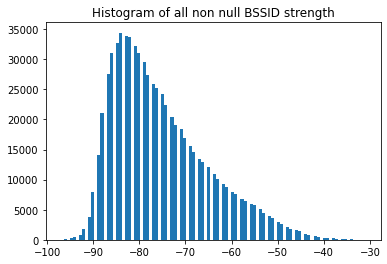

(-97, -78.0, -31, -75.4001172241543)

In [ ]:
plt.hist(fl[fl>-999],100)
plt.title('Histogram of all non null BSSID strength')
plt.show()
print('')
fl[fl>-999].min(),np.median(fl[fl>-999]),fl[fl>-999].max(),fl[fl>-999].mean()

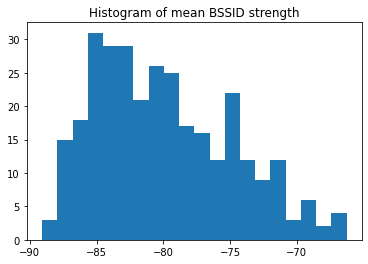

In [ ]:
plt.hist(np.nanmean(data2,0),20)
plt.title('Histogram of mean BSSID strength')
plt.show()

In [ ]:
np.sum(((~np.isnan(data2))*1).values,0).shape

(312,)

In [ ]:
np.sum(((~np.isnan(data2))*1).values,0).min(),np.sum(((~np.isnan(data2))*1).values,0).max(),np.median(np.sum(((~np.isnan(data2))*1).values,0)),np.mean(np.sum(((~np.isnan(data2))*1).values,0))

(46, 12836, 1300.0, 2302.1858974358975)

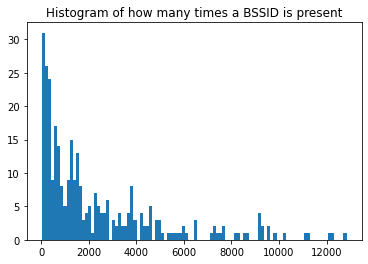

In [ ]:
plt.hist(np.sum(((~np.isnan(data2))*1).values,0),100)
plt.title('Histogram of how many times a BSSID is present')
plt.show()

In [ ]:

unpaths=data.path.unique()
np.random.seed(42)
sh=np.random.permutation(unpaths)
indexes=[]
k=5
val_size=int(len(sh)/k)
for f in range(k):
    # print('fold:', f)

    if f<(k-1):
        val_paths=sh[val_size*f:val_size*(f+1)]
    else:
        val_paths=sh[val_size*f:]

    X_val = data.loc[data.path.isin(val_paths), : ]
    indexes.extend(np.array(X_val.index).tolist())

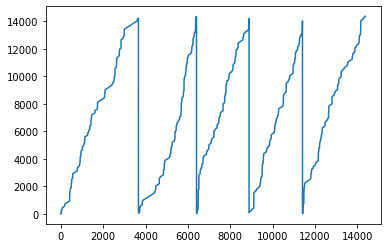

In [ ]:
plt.plot(indexes)
plt.show()

In [ ]:
data=data.iloc[indexes,:].reset_index()

In [ ]:
targets=data.loc[:,['x','y']]

In [ ]:
lgbm_oof=pd.read_csv(base_path+'lgbmforPdata423_oof.csv.gz')
keras_oof=pd.read_csv(base_path+'kerasforPdata423_oof.csv.gz')
kneighbors_oof=pd.read_csv(base_path+'KNeighbors_forPdata423.csv.gz')

In [ ]:
scoreperrow=[]
for row in range(len(targets)):
    scoreperrow.append(euclidean_distance(targets.iloc[row,0], targets.iloc[row,1], lgbm_oof.iloc[row,0], lgbm_oof.iloc[row,1]))
print('LightGBM mean error:',np.mean(scoreperrow), 'std:', np.std(scoreperrow))
scoreperrow0=[]
for row in range(len(targets)):
    scoreperrow0.append(euclidean_distance(targets.iloc[row,0], targets.iloc[row,1], keras_oof.iloc[row,0], keras_oof.iloc[row,1]))
print('Keras mean error:',np.mean(scoreperrow0), 'std:', np.std(scoreperrow0))
scoreperrow1=[]
for row in range(len(targets)):
    scoreperrow1.append(euclidean_distance(targets.iloc[row,0], targets.iloc[row,1], kneighbors_oof.iloc[row,0], kneighbors_oof.iloc[row,1]))
print('KNN mean error:',np.mean(scoreperrow1), 'std:', np.std(scoreperrow1))

scoreperrow2=[]
for row in range(len(targets)):
    scoreperrow2.append(euclidean_distance(targets.iloc[row,0], targets.iloc[row,1], (lgbm_oof.iloc[row,0]+keras_oof.iloc[row,0])/2, (lgbm_oof.iloc[row,1]+keras_oof.iloc[row,1])/2))
print('LightGBM+Keras mean error:',np.mean(scoreperrow2), 'std:', np.std(scoreperrow2))
scoreperrow3=[]
for row in range(len(targets)):
    scoreperrow3.append(euclidean_distance(targets.iloc[row,0], targets.iloc[row,1], (2*lgbm_oof.iloc[row,0]+keras_oof.iloc[row,0])/3, (2*lgbm_oof.iloc[row,1]+keras_oof.iloc[row,1])/3))
print('2*LightGBM+Keras mean error:',np.mean(scoreperrow3), 'std:', np.std(scoreperrow3))

# LightGBM mean error: 1.9529932224674111 std: 1.5347026404174788
# Keras mean error: 2.087256619374072 std: 1.6936292823396264
# KNN mean error: 2.404093368633137 std: 1.764151572932029
# LightGBM+Keras mean error: 1.9337132261573156 std: 1.555619831215852
# 2*LightGBM+Keras mean error: 1.92060649798294 std: 1.5343838583668414


LightGBM mean error: 1.9529932224674111 std: 1.5347026404174788
Keras mean error: 2.087256619374072 std: 1.6936292823396264
KNN mean error: 2.404093368633137 std: 1.764151572932029
LightGBM+Keras mean error: 1.9337132261573156 std: 1.555619831215852
2*LightGBM+Keras mean error: 1.92060649798294 std: 1.5343838583668414


In [ ]:
pd.DataFrame({'scores':scoreperrow})

,scores
0,3.052752
1,3.052752
2,1.012071
3,1.012071
4,1.878694
...,...
14368,2.159532
14369,2.867934
14370,3.076230
14371,0.977898


In [ ]:
lgbm_oof_half=pd.read_csv(base_path+'lgbmforPdata423_halfgrid_oof2.csv.gz')
keras_oof_half=pd.read_csv(base_path+'kerasforPdata423_halfgrid_oof2.csv.gz')
kneighbors_oof_half=pd.read_csv(base_path+'KNeighborsforPdata423_halfgrid_oof2.csv.gz')

halftargets = pd.read_csv(base_path+'all_targetsV2.csv.gz')

In [ ]:
scoreperrow=[]
for row in range(len(halftargets)):
    scoreperrow.append(euclidean_distance(halftargets.iloc[row,0], halftargets.iloc[row,1], lgbm_oof_half.iloc[row,0], lgbm_oof_half.iloc[row,1]))
print('LightGBM mean error:',np.mean(scoreperrow), 'std:', np.std(scoreperrow))
scoreperrow0=[]
for row in range(len(halftargets)):
    scoreperrow0.append(euclidean_distance(halftargets.iloc[row,0], halftargets.iloc[row,1], keras_oof_half.iloc[row,0], keras_oof_half.iloc[row,1]))
print('Keras mean error:',np.mean(scoreperrow0), 'std:', np.std(scoreperrow0))
scoreperrow1=[]
for row in range(len(halftargets)):
    scoreperrow1.append(euclidean_distance(halftargets.iloc[row,0], halftargets.iloc[row,1], kneighbors_oof_half.iloc[row,0], kneighbors_oof_half.iloc[row,1]))
print('KNN mean error:',np.mean(scoreperrow1), 'std:', np.std(scoreperrow1))

scoreperrow2=[]
for row in range(len(halftargets)):
    scoreperrow2.append(euclidean_distance(halftargets.iloc[row,0], halftargets.iloc[row,1], (lgbm_oof_half.iloc[row,0]+keras_oof_half.iloc[row,0])/2, (lgbm_oof_half.iloc[row,1]+keras_oof_half.iloc[row,1])/2))
print('LightGBM+Keras mean error:',np.mean(scoreperrow2), 'std:', np.std(scoreperrow2))
scoreperrow3=[]
for row in range(len(halftargets)):
    scoreperrow3.append(euclidean_distance(halftargets.iloc[row,0], halftargets.iloc[row,1], (2*lgbm_oof_half.iloc[row,0]+keras_oof_half.iloc[row,0])/3, (2*lgbm_oof_half.iloc[row,1]+keras_oof_half.iloc[row,1])/3))
print('2*LightGBM+Keras mean error:',np.mean(scoreperrow3), 'std:', np.std(scoreperrow3))

# LightGBM mean error: 1.9088332287796868 std: 1.5898835822613333
# Keras mean error: 1.939441081596716 std: 1.9377929160563563
# KNN mean error: 2.4067891004209443 std: 1.7964998971052162
# LightGBM+Keras mean error: 1.8290031034759042 std: 1.6578374099772226
# 2*LightGBM+Keras mean error: 1.8368858285242038 std: 1.6058347440447132


LightGBM mean error: 1.9088332287796868 std: 1.5898835822613333
Keras mean error: 1.939441081596716 std: 1.9377929160563563
KNN mean error: 2.4067891004209443 std: 1.7964998971052162
LightGBM+Keras mean error: 1.8290031034759042 std: 1.6578374099772226
2*LightGBM+Keras mean error: 1.8368858285242038 std: 1.6058347440447132


In [ ]:
lgbm_oof_other=pd.read_csv(base_path+'lgbmforPdata423_halfgrid_othersplit_oof2.csv.gz')
keras_oof_other=pd.read_csv(base_path+'kerasforPdata423_halfgrid_othersplit_oof2.csv.gz')
kneighbors_oof_other=pd.read_csv(base_path+'KNeighborsforPdata423_halfgrid_othersplit_oof2.csv.gz')

othertargets = pd.read_csv(base_path+'all_targetsV2_othersplit.csv.gz')

In [ ]:
scoreperrow=[]
for row in range(len(othertargets)):
    scoreperrow.append(euclidean_distance(othertargets.iloc[row,0], othertargets.iloc[row,1], lgbm_oof_other.iloc[row,0], lgbm_oof_other.iloc[row,1]))
print('LightGBM mean error:',np.mean(scoreperrow), 'std:', np.std(scoreperrow))
scoreperrow0=[]
for row in range(len(othertargets)):
    scoreperrow0.append(euclidean_distance(othertargets.iloc[row,0], othertargets.iloc[row,1], keras_oof_other.iloc[row,0], keras_oof_other.iloc[row,1]))
print('Keras mean error:',np.mean(scoreperrow0), 'std:', np.std(scoreperrow0))
scoreperrow1=[]
for row in range(len(othertargets)):
    scoreperrow1.append(euclidean_distance(othertargets.iloc[row,0], othertargets.iloc[row,1], kneighbors_oof_other.iloc[row,0], kneighbors_oof_other.iloc[row,1]))
print('KNN mean error:',np.mean(scoreperrow1), 'std:', np.std(scoreperrow1))

scoreperrow2=[]
for row in range(len(othertargets)):
    scoreperrow2.append(euclidean_distance(othertargets.iloc[row,0], othertargets.iloc[row,1], (lgbm_oof_other.iloc[row,0]+keras_oof_other.iloc[row,0])/2, (lgbm_oof_other.iloc[row,1]+keras_oof_other.iloc[row,1])/2))
print('LightGBM+Keras mean error:',np.mean(scoreperrow2), 'std:', np.std(scoreperrow2))
scoreperrow3=[]
for row in range(len(othertargets)):
    scoreperrow3.append(euclidean_distance(othertargets.iloc[row,0], othertargets.iloc[row,1], (2*lgbm_oof_other.iloc[row,0]+keras_oof_other.iloc[row,0])/3, (2*lgbm_oof_other.iloc[row,1]+keras_oof_other.iloc[row,1])/3))
print('2*LightGBM+Keras mean error:',np.mean(scoreperrow3), 'std:', np.std(scoreperrow3))

# LightGBM mean error: 2.1566466977545864 std: 1.3707505552665546
# Keras mean error: 2.431076833105465 std: 1.4450451106337088
# KNN mean error: 2.53234560113082 std: 1.5223842716755438
# LightGBM+Keras mean error: 2.1843934304162174 std: 1.3537834062915384
# 2*LightGBM+Keras mean error: 2.1484238337565484 std: 1.348034899896814



LightGBM mean error: 2.1566466977545864 std: 1.3707505552665546
Keras mean error: 2.431076833105465 std: 1.4450451106337088
KNN mean error: 2.53234560113082 std: 1.5223842716755438
LightGBM+Keras mean error: 2.1843934304162174 std: 1.3537834062915384
2*LightGBM+Keras mean error: 2.1484238337565484 std: 1.348034899896814


In [ ]:
lgbm_oof.head()

,x,y
0,45.869261,25.603355
1,45.869261,25.603355
2,44.201376,25.872951
3,44.201376,25.872951
4,42.905661,25.928572


In [ ]:
print('LGBM OOF:\t',euclidean_distance(targets.x, targets.y, lgbm_oof.x, lgbm_oof.y))
print('Keras OOF:\t',euclidean_distance(targets.x, targets.y, keras_oof.x, keras_oof.y))
print('KNeighbors OOF:\t',euclidean_distance(targets.x, targets.y, kneighbors_oof.x, kneighbors_oof.y))

LGBM OOF:	 1.952993222467423
Keras OOF:	 2.087256619374078
KNeighbors OOF:	 2.4040933686331405


In [ ]:
print('1*LGBM+1*keras OOF:\t',euclidean_distance(targets.x, targets.y, (lgbm_oof.x+keras_oof.x)/2, (lgbm_oof.y+keras_oof.y)/2 ))
print('2*LGBM+1*keras OOF:\t',euclidean_distance(targets.x, targets.y, (2*lgbm_oof.x+keras_oof.x)/3, (2*lgbm_oof.y+keras_oof.y)/3 ))

1*LGBM+1*keras OOF:	 1.9337132261573304
2*LGBM+1*keras OOF:	 1.9206064979829385


In [ ]:
unpaths=data.path.unique()

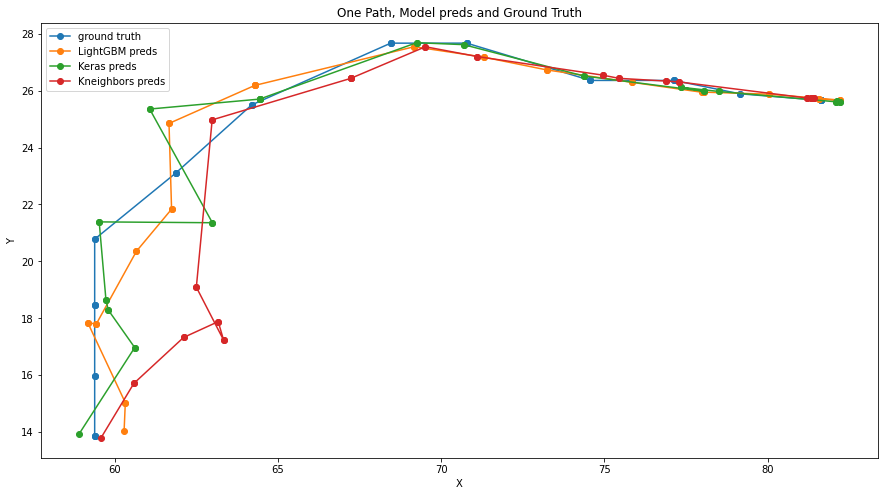

In [ ]:
num=11
plt.figure(figsize=(15,8))
# plt.title('Path:'+unpaths[num])
plt.title('One Path, Model preds and Ground Truth')
plt.plot(data.x.loc[data.path==unpaths[num]],data.y.loc[data.path==unpaths[num]],'o-',label='ground truth')
plt.plot(lgbm_oof.x.loc[data.path==unpaths[num]],lgbm_oof.y.loc[data.path==unpaths[num]],'o-',label='LightGBM preds')
plt.plot(keras_oof.x.loc[data.path==unpaths[num]],keras_oof.y.loc[data.path==unpaths[num]],'o-',label='Keras preds')
plt.plot(kneighbors_oof.x.loc[data.path==unpaths[num]],kneighbors_oof.y.loc[data.path==unpaths[num]],'o-',label='Kneighbors preds')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

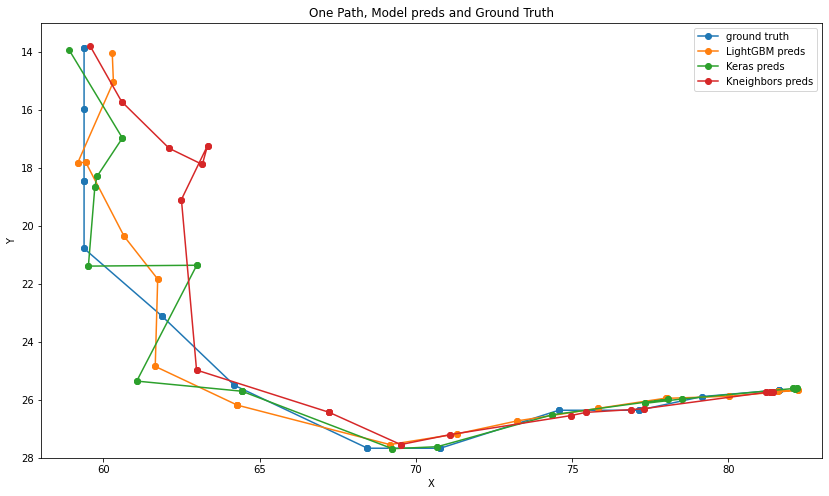

In [ ]:
num=11
plt.figure(figsize=(14,8))
# plt.title('Path:'+unpaths[num])
plt.title('One Path, Model preds and Ground Truth')
plt.plot(data.x.loc[data.path==unpaths[num]],data.y.loc[data.path==unpaths[num]],'o-',label='ground truth')
plt.plot(lgbm_oof.x.loc[data.path==unpaths[num]],lgbm_oof.y.loc[data.path==unpaths[num]],'o-',label='LightGBM preds')
plt.plot(keras_oof.x.loc[data.path==unpaths[num]],keras_oof.y.loc[data.path==unpaths[num]],'o-',label='Keras preds')
plt.plot(kneighbors_oof.x.loc[data.path==unpaths[num]],kneighbors_oof.y.loc[data.path==unpaths[num]],'o-',label='Kneighbors preds')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.axis([58, 83, 28, 13])
plt.show()

In [ ]:
print('LGBM Path Error:\t',euclidean_distance(targets.x.loc[data.path==unpaths[num]], targets.y.loc[data.path==unpaths[num]], lgbm_oof.x.loc[data.path==unpaths[num]], lgbm_oof.y.loc[data.path==unpaths[num]]))
print('Keras Path Error:\t',euclidean_distance(targets.x.loc[data.path==unpaths[num]], targets.y.loc[data.path==unpaths[num]], keras_oof.x.loc[data.path==unpaths[num]], keras_oof.y.loc[data.path==unpaths[num]]))
print('KNeighbors Path Error:\t',euclidean_distance(targets.x.loc[data.path==unpaths[num]], targets.y.loc[data.path==unpaths[num]], kneighbors_oof.x.loc[data.path==unpaths[num]], kneighbors_oof.y.loc[data.path==unpaths[num]]))

LGBM Path Error:	 1.2484877873394347
Keras Path Error:	 1.521359779858973
KNeighbors Path Error:	 1.9112077513037398


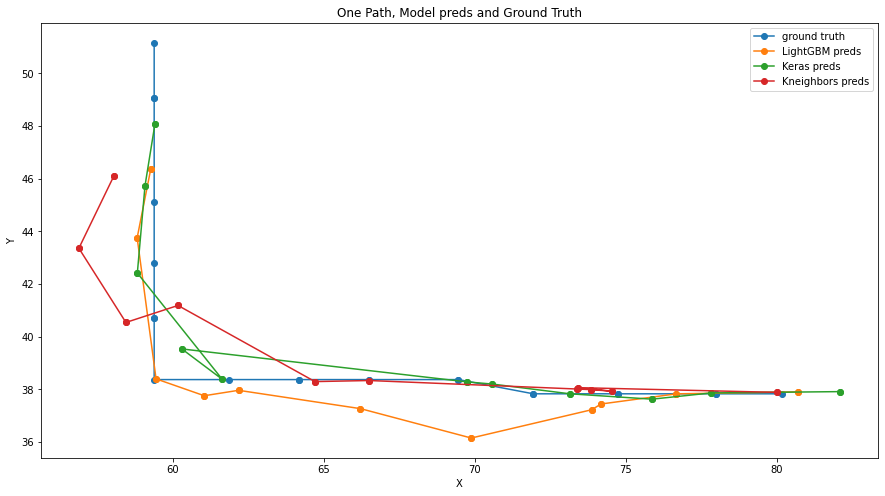

In [ ]:
num=34
plt.figure(figsize=(15,8))
# plt.title('Path:'+unpaths[num])
plt.title('One Path, Model preds and Ground Truth')
plt.plot(data.x.loc[data.path==unpaths[num]],data.y.loc[data.path==unpaths[num]],'o-',label='ground truth')
plt.plot(lgbm_oof.x.loc[data.path==unpaths[num]],lgbm_oof.y.loc[data.path==unpaths[num]],'o-',label='LightGBM preds')
plt.plot(keras_oof.x.loc[data.path==unpaths[num]],keras_oof.y.loc[data.path==unpaths[num]],'o-',label='Keras preds')
plt.plot(kneighbors_oof.x.loc[data.path==unpaths[num]],kneighbors_oof.y.loc[data.path==unpaths[num]],'o-',label='Kneighbors preds')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
print('LGBM Path Error:\t',euclidean_distance(targets.x.loc[data.path==unpaths[num]], targets.y.loc[data.path==unpaths[num]], lgbm_oof.x.loc[data.path==unpaths[num]], lgbm_oof.y.loc[data.path==unpaths[num]]))
print('Keras Path Error:\t',euclidean_distance(targets.x.loc[data.path==unpaths[num]], targets.y.loc[data.path==unpaths[num]], keras_oof.x.loc[data.path==unpaths[num]], keras_oof.y.loc[data.path==unpaths[num]]))
print('KNeighbors Path Error:\t',euclidean_distance(targets.x.loc[data.path==unpaths[num]], targets.y.loc[data.path==unpaths[num]], kneighbors_oof.x.loc[data.path==unpaths[num]], kneighbors_oof.y.loc[data.path==unpaths[num]]))

LGBM Path Error:	 2.4801088861930998
Keras Path Error:	 2.519798604094524
KNeighbors Path Error:	 2.6722567741068803


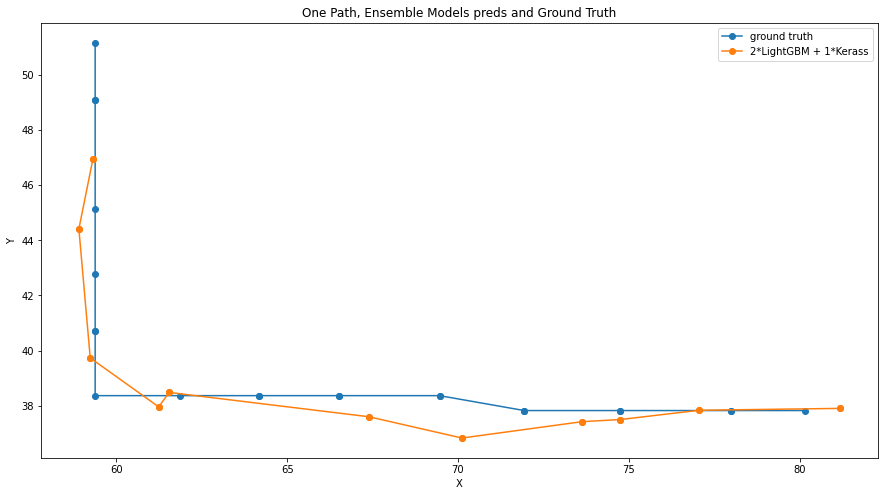

In [ ]:
plt.figure(figsize=(15,8))
# plt.title('Path:'+unpaths[num])
plt.title('One Path, Ensemble Models preds and Ground Truth')
plt.plot(data.x.loc[data.path==unpaths[num]],data.y.loc[data.path==unpaths[num]],'o-',label='ground truth')
plt.plot((2*lgbm_oof.x.loc[data.path==unpaths[num]]+keras_oof.x.loc[data.path==unpaths[num]])/3,
         (2*lgbm_oof.y.loc[data.path==unpaths[num]]+keras_oof.y.loc[data.path==unpaths[num]])/3,'o-',label='2*LightGBM + 1*Kerass')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
print('2*LGBM + 1*KerasPath Error:\t',euclidean_distance(targets.x.loc[data.path==unpaths[num]], targets.y.loc[data.path==unpaths[num]], (2*lgbm_oof.x.loc[data.path==unpaths[num]]+keras_oof.x.loc[data.path==unpaths[num]])/3,
      (2*lgbm_oof.y.loc[data.path==unpaths[num]]+keras_oof.y.loc[data.path==unpaths[num]])/3 ))

2*LGBM + 1*Keras Path Error:	 2.3085016836136156


### SMOOTH

In [ ]:
ALLxypreds=(2*lgbm_oof+keras_oof)/3
print('Ensemble Error:\t\t\t\t',euclidean_distance(targets.x, targets.y, ALLxypreds.x, ALLxypreds.y ))

Ensemble Error:				 1.9206064979829385


In [ ]:
print('Ensemble Error:\t\t\t\t',euclidean_distance(targets.x, targets.y, (99*ALLxypreds.x+targets.x.mean())/100, (99*ALLxypreds.y+targets.y.mean())/100 ))

Ensemble Error:				 1.9330348832335686


In [ ]:
smoothedX=np.zeros(len(ALLxypreds))
smoothedY=np.zeros(len(ALLxypreds))
for p in unpaths:
    smoothed_x = ALLxypreds.x.loc[data.path==p].ewm(alpha=0.97).mean().values
    smoothed_y = ALLxypreds.y.loc[data.path==p].ewm(alpha=0.97).mean().values
    smoothedX[data.path==p] = smoothed_x
    smoothedY[data.path==p] = smoothed_y
print('2*LGBM + 1*KerasPath ewm Error:\t',euclidean_distance(targets.x, targets.y, smoothedX, smoothedY ))    

2*LGBM + 1*KerasPath ewm Error:	 1.9195550011866906


In [ ]:
smoothedX=np.zeros(len(ALLxypreds))
smoothedY=np.zeros(len(ALLxypreds))
for p in unpaths:
    ALLxypredsXY=ALLxypreds.loc[data.path==p].rolling(5, center=True).mean()
    smoothed_x = ALLxypredsXY.x.values
    smoothed_y = ALLxypredsXY.y.values
    smoothedX[data.path==p] = smoothed_x
    smoothedY[data.path==p] = smoothed_y
print('2*LGBM + 1*KerasPath rolling5 center mean Error:\t',euclidean_distance(targets.x, targets.y, smoothedX, smoothedY ))    

2*LGBM + 1*KerasPath rolling5 center mean Error:	 1.6201280338974204


In [ ]:
smoothedX=np.zeros(len(ALLxypreds))
smoothedY=np.zeros(len(ALLxypreds))
for p in unpaths:
    ALLxypredsXY=ALLxypreds.loc[data.path==p]
    ALLxypredsXY.iloc[1:,:] = 0.96*ALLxypredsXY.iloc[1:,:].values + 0.04*ALLxypredsXY.iloc[:-1,:].values
    smoothed_x = ALLxypredsXY.x.values
    smoothed_y = ALLxypredsXY.y.values
    smoothedX[data.path==p] = smoothed_x
    smoothedY[data.path==p] = smoothed_y
print('2*LGBM + 1*KerasPath rolling2 Error:\t',euclidean_distance(targets.x, targets.y, smoothedX, smoothedY ))    

2*LGBM + 1*KerasPath rolling2 Error:	 1.9191584949951492


In [ ]:
smoothedX=np.zeros(len(ALLxypreds))
smoothedY=np.zeros(len(ALLxypreds))
for p in unpaths:
    ALLxypredsXY=ALLxypreds.loc[data.path==p]
    xyrows=[]
    for row in range(len(ALLxypredsXY)):
        xyrow=ALLxypredsXY.iloc[row,:].values
        if row>0:
            xyrowP=0.97*xyrow+0.03*xyrowP
            xyrows.append(xyrowP)

        else:
            xyrows.append(xyrow)
            xyrowP=xyrow.copy()

    ALLxypredsXY = pd.DataFrame(np.stack(xyrows), columns=['x','y'])
    smoothed_x = ALLxypredsXY.x.values
    smoothed_y = ALLxypredsXY.y.values
    smoothedX[data.path==p] = smoothed_x
    smoothedY[data.path==p] = smoothed_y
print('2*LGBM + 1*KerasPath rolling2 Error:\t',euclidean_distance(targets.x, targets.y, smoothedX, smoothedY ))    

2*LGBM + 1*KerasPath rolling2 Error:	 1.9195552746496958


array([[46.74618452, 25.73146173],
       [46.74618452, 25.73146173],
       [44.42122232, 25.91242202],
       [44.42122232, 25.91242202],
       [43.39207384, 25.61847555],
       [43.39207384, 25.61847555],
       [39.58500505, 25.75664422],
       [39.58500505, 25.75664422],
       [39.46565251, 25.652845  ],
       [39.46565251, 25.652845  ],
       [40.01340929, 25.75802254],
       [40.01340929, 25.75802254],
       [43.49784946, 25.71516839],
       [43.49784946, 25.71516839]])

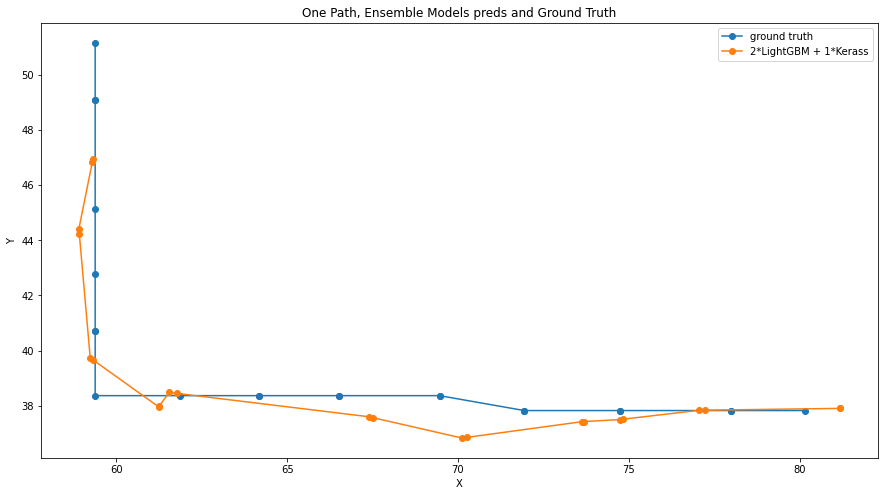

In [ ]:
xypreds_rollX=smoothedX[data.path==unpaths[num]]
xypreds_rollY=smoothedY[data.path==unpaths[num]]
plt.figure(figsize=(15,8))
# plt.title('Path:'+unpaths[num])
plt.title('One Path, Ensemble Models preds and Ground Truth')
plt.plot(data.x.loc[data.path==unpaths[num]],data.y.loc[data.path==unpaths[num]],'o-',label='ground truth')
plt.plot( xypreds_rollX, xypreds_rollY,'o-',label='2*LightGBM + 1*Kerass')
# plt.plot( predsx_ewm, predsy_ewm,'o-',label='2*LightGBM + 1*Kerass')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### APPLY KALMAN FILTER

In [ ]:
def kalman_xy(x, P, measurement, R,
              motion = np.matrix('0. 0. 0. 0.').T,
              Q = np.matrix(np.eye(4))):
    """
    Parameters:    
    x: initial state 4-tuple of location and velocity: (x0, x1, x0_dot, x1_dot)
    P: initial uncertainty convariance matrix
    measurement: observed position
    R: measurement noise 
    motion: external motion added to state vector x
    Q: motion noise (same shape as P)
    """
    return kalman(x, P, measurement, R, motion, Q,
                  F = np.matrix('''
                      1. 0. 1. 0.;
                      0. 1. 0. 1.;
                      0. 0. 1. 0.;
                      0. 0. 0. 1.
                      '''),
                  H = np.matrix('''
                      1. 0. 0. 0.;
                      0. 1. 0. 0.'''))

def kalman(x, P, measurement, R, motion, Q, F, H):
    '''
    Parameters:
    x: initial state
    P: initial uncertainty convariance matrix
    measurement: observed position (same shape as H*x)
    R: measurement noise (same shape as H)
    motion: external motion added to state vector x
    Q: motion noise (same shape as P)
    F: next state function: x_prime = F*x
    H: measurement function: position = H*x

    Return: the updated and predicted new values for (x, P)

    See also http://en.wikipedia.org/wiki/Kalman_filter

    This version of kalman can be applied to many different situations by
    appropriately defining F and H 
    '''
    # UPDATE x, P based on measurement m    
    # distance between measured and current position-belief
    y = np.matrix(measurement).T - H * x
    S = H * P * H.T + R  # residual convariance
    K = P * H.T * S.I    # Kalman gain
    x = x + K*y
    I = np.matrix(np.eye(F.shape[0])) # identity matrix
    P = (I - K*H)*P

    # PREDICT x, P based on motion
    x = F*x + motion
    P = F*P*F.T + Q

    return x, P
def path_kalman_xy(observed_x, observed_y):
    x = np.matrix('0. 0. 0. 0.').T 
    P = np.matrix(np.eye(4))*1000 # initial uncertainty

    result = []
    R = 0.001**2
    for meas in zip(observed_x, observed_y):
        x, P = kalman_xy(x, P, meas, R)
        result.append((x[:2]).tolist())
    kalman_x, kalman_y = zip(*result)
    return( np.array(kalman_x)[:,0], np.array(kalman_y)[:,0] )

In [ ]:
ALLxypreds=(2*lgbm_oof+keras_oof)/3

In [ ]:
smoothedX=np.zeros(len(ALLxypreds))
smoothedY=np.zeros(len(ALLxypreds))
for p in unpaths:
    observed_x = ALLxypreds.x.loc[data.path==p].values
    observed_y = ALLxypreds.y.loc[data.path==p].values
    kalman_x, kalman_y = path_kalman_xy(observed_x, observed_y)
    smoothedX[data.path==p] = kalman_x
    smoothedY[data.path==p] = kalman_y
    

In [ ]:
print('Ensemble Error:\t\t\t\t',euclidean_distance(targets.x, targets.y, ALLxypreds.x, ALLxypreds.y ))
print('Ensemble Kalman Error:\t\t\t',euclidean_distance(targets.x, targets.y, smoothedX, smoothedY ))
print('Ensemble + Ensemble Kalman Error:\t',euclidean_distance(targets.x, targets.y, (smoothedX+ALLxypreds.x)/2, (smoothedY+ALLxypreds.y)/2 ))
print('2*Ensemble + Ensemble Kalman Error:\t',euclidean_distance(targets.x, targets.y, (smoothedX+2*ALLxypreds.x)/3, (smoothedY+2*ALLxypreds.y)/3 ))
print('3*Ensemble + Ensemble Kalman  Error:\t',euclidean_distance(targets.x, targets.y, (smoothedX+3*ALLxypreds.x)/4, (smoothedY+3*ALLxypreds.y)/4 ))

Ensemble Error:				 1.9206064979829385
Ensemble Kalman Error:			 2.2177040624404003
Ensemble + Ensemble Kalman Error:	 1.9948013968584994
2*Ensemble + Ensemble Kalman Error:	 1.948488123123337
3*Ensemble + Ensemble Kalman  Error:	 1.932613536463998


### APPLY SNAP TO GRID POST PROCESS 

In [ ]:

oof_sample3a_snap2grid=np.zeros((len(oof_sample3a),2))
# oof_sample3a_snap2grid=oof_sample3a.values.copy()
oof_sample3a=oof_sample3.loc[:,['x','y']].reset_index(drop=True)
THRESHOLD=20

def snap2grid_multi(sid):
#     global oof_sample3a_snap2grid
    
    for floor in np.unique(train_targets.floor.loc[train_targets.site_id==sid]):
        siteandfloor = train_targets.loc[(train_targets.floor==floor)&(train_targets.site_id==sid),:].reset_index()
        print(sid, floor)
        
        ids=np.array(data_sample.loc[(data_sample.floor==floor)&(data_sample.site_id==sid),:].index)
        for j in ids:
            
            siteandfloor2=siteandfloor.loc[(siteandfloor.x<oof_sample3a.iloc[j,0]+20)&(siteandfloor.x>oof_sample3a.iloc[j,0]-20)&
                                          (siteandfloor.y<oof_sample3a.iloc[j,1]+20)&(siteandfloor.y>oof_sample3a.iloc[j,1]-20)].reset_index()
            if len(siteandfloor2)==0:
                siteandfloor2=siteandfloor.copy()
            sr=np.argmin(siteandfloor2.loc[:,['x','y']].apply(lambda x: distancefrom(oof_sample3a.iloc[j,:], x),1).values)
            smmin=np.min(siteandfloor2.loc[:,['x','y']].apply(lambda x: distancefrom(oof_sample3a.iloc[j,:], x),1).values)
            if smmin<THRESHOLD:
                
                sanp2grid_xy=siteandfloor2.loc[sr,['x','y']].values
                oof_sample3a_snap2grid[j,:]=sanp2grid_xy
            else:
#                 oof_sample3aS= oof_sample3aS.loc[(data_sample.floor==floor)&(data_sample.site_id==sid),:].reset_index()
#                 oof_sample3aS2=oof_sample3aS.loc[(oof_sample3aS.x<oof_sample3a.iloc[j,0]+20)&(oof_sample3aS.x>oof_sample3a.iloc[j,0]-20)&
#                                           (oof_sample3aS.y<oof_sample3a.iloc[j,1]+20)&(oof_sample3aS.y>oof_sample3a.iloc[j,1]-20)].reset_index()
                
                sanp2grid_xy=siteandfloor2.loc[sr,['x','y']].values
                oof_sample3a_snap2grid[j,:]=sanp2grid_xy
                sanp2grid_xy=(oof_sample3a.loc[j,['x','y']].values+sanp2grid_xy)/2
#                 sanp2grid_xy=oof_sample3a.loc[j,['x','y']].values
                oof_sample3a_snap2grid[j,:]=sanp2grid_xy
#                 print(smmin)
    return oof_sample3a_snap2grid

with Pool(num_cores) as pool:
    oof_sample3a_snap2grid = pool.map(snap2grid_multi, np.unique(data_sample.site_id)  )  
    pool.close()
oof_sample3a_snap2grid=np.sum(np.stack(oof_sample3a_snap2grid),0)        

In [ ]:
import multiprocessing

from multiprocessing import Pool

num_cores = multiprocessing.cpu_count()
# num_cores=12


def distancefrom(vals2, xy):
    d=(vals2[0]-xy[0])**2+(vals2[1]-xy[1])**2
    return d

data0=data.drop_duplicates(subset=(['x','y']))
data0.shape

(87, 317)

In [ ]:
num_cores

2

In [ ]:
pathxy = targets.loc[data.path==p,:].reset_index()
inds=np.array(data.loc[data.path==p,:].index)

In [ ]:
THRESHOLD=20
oof_sample3a_snap2grid=np.zeros((len(ALLxypreds),2))

for j in inds:
            
    data2=data0.loc[(data0.x<ALLxypreds.iloc[j,0]+20)&(data0.x>ALLxypreds.iloc[j,0]-20)&
                                    (data0.y<ALLxypreds.iloc[j,1]+20)&(data0.y>ALLxypreds.iloc[j,1]-20)].reset_index()
    if len(data2)==0:
        data2=data0.copy()
    sr=np.argmin(data2.loc[:,['x','y']].apply(lambda x: distancefrom(ALLxypreds.iloc[j,:], x),1).values)
    smmin=np.min(data2.loc[:,['x','y']].apply(lambda x: distancefrom(ALLxypreds.iloc[j,:], x),1).values)
    if smmin<THRESHOLD:
        
        snap2grid_xy=data2.loc[sr,['x','y']].values
        oof_sample3a_snap2grid[j,:]=snap2grid_xy
    else:
#                 oof_sample3aS= oof_sample3aS.loc[(data_sample.floor==floor)&(data_sample.site_id==sid),:].reset_index()
#                 oof_sample3aS2=oof_sample3aS.loc[(oof_sample3aS.x<oof_sample3a.iloc[j,0]+20)&(oof_sample3aS.x>oof_sample3a.iloc[j,0]-20)&
#                                           (oof_sample3aS.y<oof_sample3a.iloc[j,1]+20)&(oof_sample3aS.y>oof_sample3a.iloc[j,1]-20)].reset_index()
        
        snap2grid_xy=data2.loc[sr,['x','y']].values
        oof_sample3a_snap2grid[j,:]=snap2grid_xy
        # sanp2grid_xy=(ALLxypreds.loc[j,['x','y']].values+snap2grid_xy)/2
        # oof_sample3a_snap2grid[j,:]=snap2grid_xy

In [ ]:
THRESHOLD=20
def snap2grid_multi(p):
    oof_ALLxy_snap2grid=np.zeros((len(ALLxypreds),2))
    
    # pathxy = targets.loc[data.path==p,:].reset_index()
    inds=np.array(data.loc[data.path==p,:].index)

    for j in inds:
                
        data2=data0.loc[(data0.x<ALLxypreds.iloc[j,0]+20)&(data0.x>ALLxypreds.iloc[j,0]-20)&
                                        (data0.y<ALLxypreds.iloc[j,1]+20)&(data0.y>ALLxypreds.iloc[j,1]-20)].reset_index()
        if len(data2)==0:
            data2=data0.copy()
        sr=np.argmin(data2.loc[:,['x','y']].apply(lambda x: distancefrom(ALLxypreds.iloc[j,:], x),1).values)
        smmin=np.min(data2.loc[:,['x','y']].apply(lambda x: distancefrom(ALLxypreds.iloc[j,:], x),1).values)
        if smmin<THRESHOLD:
            
            snap2grid_xy=data2.loc[sr,['x','y']].values
            oof_ALLxy_snap2grid[j,:]=snap2grid_xy
        else:
    #                 oof_sample3aS= oof_sample3aS.loc[(data_sample.floor==floor)&(data_sample.site_id==sid),:].reset_index()
    #                 oof_sample3aS2=oof_sample3aS.loc[(oof_sample3aS.x<oof_sample3a.iloc[j,0]+20)&(oof_sample3aS.x>oof_sample3a.iloc[j,0]-20)&
    #                                           (oof_sample3aS.y<oof_sample3a.iloc[j,1]+20)&(oof_sample3aS.y>oof_sample3a.iloc[j,1]-20)].reset_index()
            
            # snap2grid_xy=data2.loc[sr,['x','y']].values
            # oof_ALLxy_snap2grid[j,:]=snap2grid_xy
            # sanp2grid_xy=(ALLxypreds.loc[j,['x','y']].values+snap2grid_xy)/2
            snap2grid_xy=ALLxypreds.loc[j,['x','y']].values
            oof_ALLxy_snap2grid[j,:]=snap2grid_xy
#                 print(smmin)
    return oof_ALLxy_snap2grid

with Pool(num_cores) as pool:
    oof_ALLxy_snap2grid = pool.map(snap2grid_multi, np.unique(data.path)  )  
    pool.close()
oof_ALLxy_snap2grid=np.sum(np.stack(oof_ALLxy_snap2grid),0)        

In [ ]:
print('Ensemble Error:\t\\t',euclidean_distance(targets.x, targets.y, ALLxypreds.x, ALLxypreds.y ))
print('Ensemble Snap2Grid Error:\t',euclidean_distance(targets.x, targets.y, oof_ALLxy_snap2grid[:,0], oof_ALLxy_snap2grid[:,1] ))

Ensemble Error:	\t 1.9206064979829385
Ensemble Snap2Grid Error:	 1.7788982775244095


In [ ]:
THRESHOLD=5

with Pool(num_cores) as pool:
    oof_ALLxy_snap2grid = pool.map(snap2grid_multi, np.unique(data.path)  )  
    pool.close()
oof_ALLxy_snap2grid=np.sum(np.stack(oof_ALLxy_snap2grid),0)
print('Ensemble Snap2Grid Error:\t',euclidean_distance(targets.x, targets.y, oof_ALLxy_snap2grid[:,0], oof_ALLxy_snap2grid[:,1] ))

Ensemble Snap2Grid Error:	 1.7832266661596619


In [ ]:
THRESHOLD=2.5

with Pool(num_cores) as pool:
    oof_ALLxy_snap2grid = pool.map(snap2grid_multi, np.unique(data.path)  )  
    pool.close()
oof_ALLxy_snap2grid=np.sum(np.stack(oof_ALLxy_snap2grid),0)
print('Ensemble Snap2Grid Error:\t',euclidean_distance(targets.x, targets.y, oof_ALLxy_snap2grid[:,0], oof_ALLxy_snap2grid[:,1] ))

Ensemble Snap2Grid Error:	 1.7903496131932897
